# Target Column
- column name: `personality`
- values:
  - `1` - Extrovert
  - `0` - Introvert

# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [3]:
data_filepath = "/content/data.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rakeshkapilavai/extrovert-vs-introvert-behavior-data",
  "personality_dataset.csv"
)

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
df.shape

(2900, 8)

In [5]:
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [8]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(" ", "_").str.lower()

In [10]:
df.sample(5)

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
2310,2.0,No,9.0,4.0,No,8.0,7.0,Extrovert
2835,1.0,No,8.0,5.0,No,11.0,8.0,Introvert
1317,0.0,No,8.0,5.0,No,9.0,3.0,Extrovert
625,3.0,No,4.0,5.0,No,11.0,7.0,Extrovert
49,1.0,No,5.0,6.0,No,8.0,10.0,Extrovert


In [15]:
df.describe()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,4.522406,0.498991,3.939039,3.013726,0.498991,6.239806,3.559548,0.514332
std,3.491162,0.500100,2.900044,2.257239,0.500100,4.311365,2.927397,0.499895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,1.000000
75%,8.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


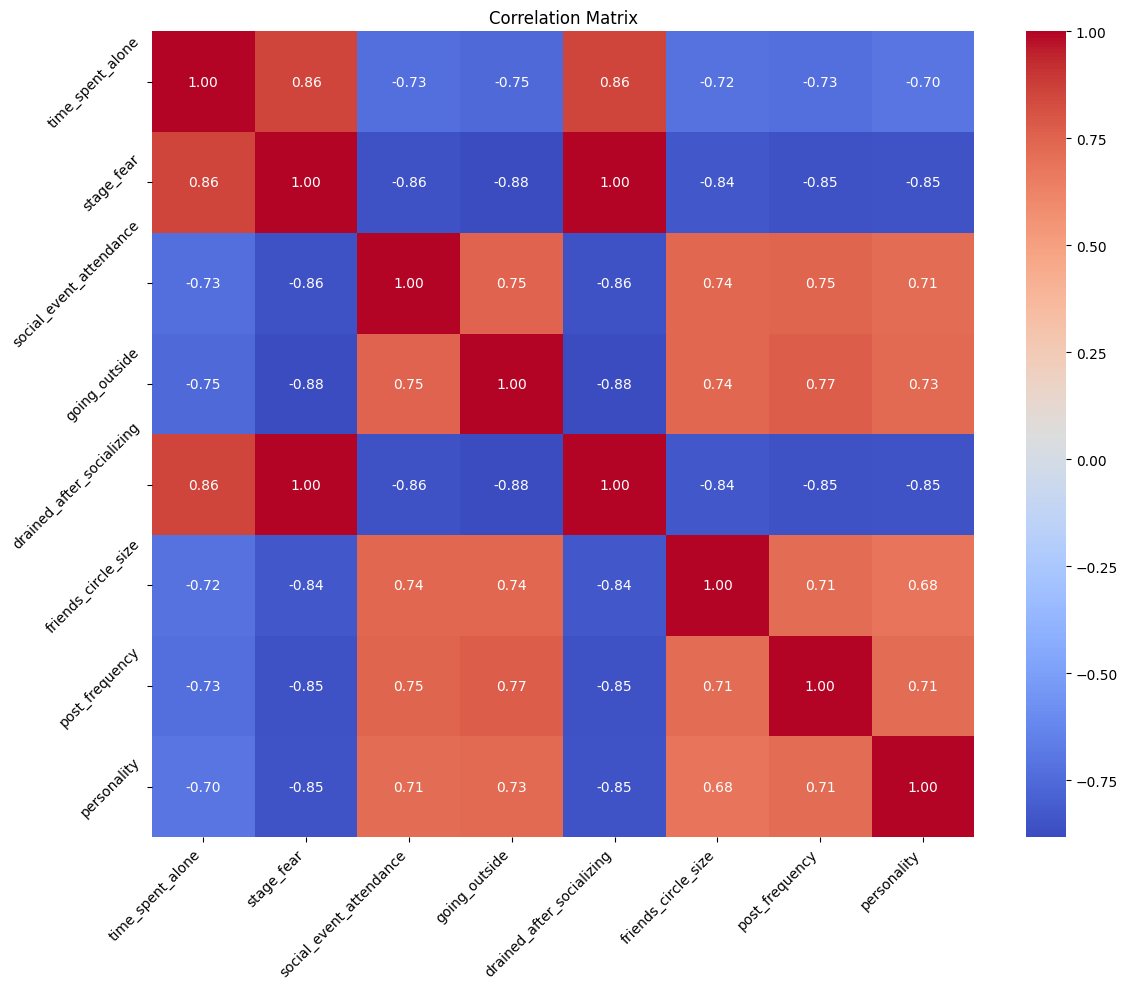

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("correlation_matrix.png")
plt.show()

In [21]:
df.sample(5)

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
1740,3.0,0,9.0,3.0,0,7.0,5.0,1
343,0.0,0,7.0,7.0,0,9.0,7.0,1
1126,0.0,0,6.0,5.0,0,14.0,6.0,1
1427,3.0,0,6.0,5.0,0,9.0,4.0,1
2159,3.0,0,7.0,5.0,0,14.0,7.0,1


In [22]:
df["personality"].value_counts()

,count
personality,
1,1274
0,1203


# Feature Engineering

In [12]:
df["stage_fear"] = np.where(df["stage_fear"] == "Yes", 1, 0)

In [13]:
df["drained_after_socializing"] = np.where(df["drained_after_socializing"] == "Yes", 1, 0)

In [14]:
df["personality"] = np.where(df["personality"] == "Extrovert", 1, 0)

# Model Development

In [23]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X = df.drop("personality", axis=1)
y = df["personality"]

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_train.shape

(1981, 7)

In [30]:
X_valid = scaler.transform(X_valid)

In [31]:
X_valid.shape

(496, 7)

In [32]:
model = Sequential()

model.add(Dense(units=32, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))

model.add(Dense(units=16, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation="sigmoid"))

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [35]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5, verbose=1, restore_best_weights=True)

In [36]:
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8184 - loss: 0.5294 - val_accuracy: 0.9244 - val_loss: 0.3420
Epoch 2/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9133 - loss: 0.3747 - val_accuracy: 0.9244 - val_loss: 0.2907
Epoch 3/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9094 - loss: 0.3630 - val_accuracy: 0.9244 - val_loss: 0.2862
Epoch 4/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9213 - loss: 0.3193 - val_accuracy: 0.9244 - val_loss: 0.2828
Epoch 5/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9143 - loss: 0.3234 - val_accuracy: 0.9244 - val_loss: 0.2802
Epoch 6/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9144 - loss: 0.3231 - val_accuracy: 0.9244 - val_loss: 0.2765
Epoch 7/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9261 - loss: 0.2895 - val_accuracy: 0.9244 - val_loss: 0.2739
Epoch 8/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9195 - loss: 0.3184 - val_accuracy: 0.9244 - 

# Plotting Model Performance

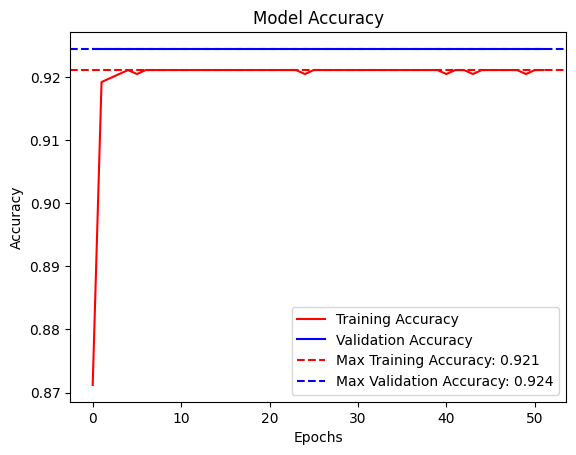

In [39]:
plt.plot(history.history["accuracy"], color="red", label="Training Accuracy")
plt.plot(history.history["val_accuracy"], color="blue", label="Validation Accuracy")

max_train_accuracy = max(history.history["accuracy"])
max_val_accuracy = max(history.history["val_accuracy"])

plt.axhline(y=max_train_accuracy, color="red", linestyle="--", label=f"Max Training Accuracy: {max_train_accuracy:.3f}")
plt.axhline(y=max_val_accuracy, color="blue", linestyle="--", label=f"Max Validation Accuracy: {max_val_accuracy:.3f}")

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("model_accuracy.png")
plt.show()

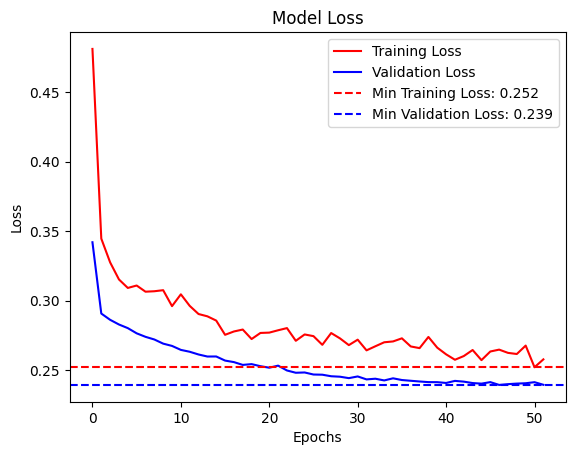

In [40]:
plt.plot(history.history["loss"], color="red", label="Training Loss")
plt.plot(history.history["val_loss"], color="blue", label="Validation Loss")

min_train_loss = min(history.history["loss"])
min_val_loss = min(history.history["val_loss"])

plt.axhline(y=min_train_loss, color="red", linestyle="--", label=f"Min Training Loss: {min_train_loss:.3f}")
plt.axhline(y=min_val_loss, color="blue", linestyle="--", label=f"Min Validation Loss: {min_val_loss:.3f}")

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("model_loss.png")
plt.show()

In [42]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

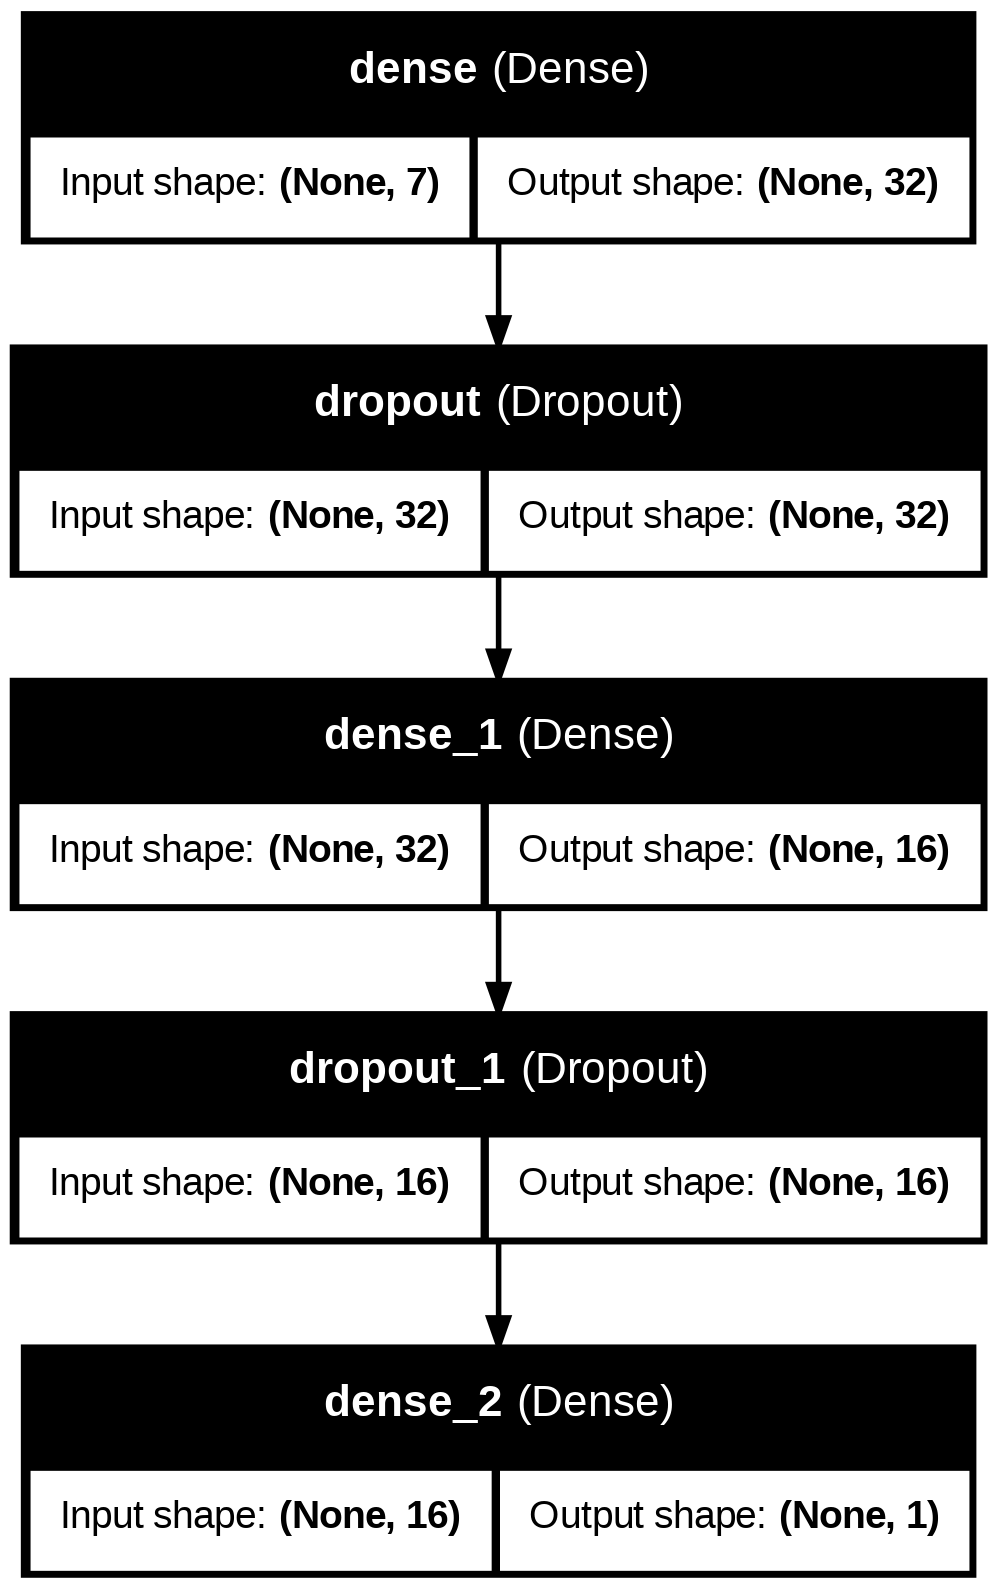

In [44]:
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

display(Image("model_plot.png", height=400))

# Prediction on New Data

In [45]:
df.sample(3)

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
544,8.0,1,3.0,1.0,1,3.0,2.0,0
534,8.0,1,3.0,0.0,1,0.0,2.0,0
966,8.0,1,1.0,0.0,1,5.0,2.0,0


In [46]:
user_input = {
    "time_spent_alone": [8.0],
    "stage_fear": [1],
    "social_event_attendance": [3.0],
    "going_outside": [1.0],
    "drained_after_socializing": [1],
    "friends_circle_size": [3.0],
    "post_frequency": [2.0]
}

X_test = pd.DataFrame(user_input)

In [47]:
X_test = scaler.transform(X_test)

In [48]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [51]:
confidence_level = y_pred[0][0]

if confidence_level > 0.5:
  label = "Extrovert"
else:
  label = "Introvert"
  confidence_level = 1 - confidence_level

print(f"Prediction: {label}")
print(f"Confidence Level: {confidence_level:.2f}")

Prediction: Introvert
Confidence Level: 0.92


# Save Model and Scaler

In [52]:
import pickle

In [53]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [54]:
model.save("persona_predictor.keras")

In [55]:
import yaml

In [56]:
with open("history.yaml", "w") as f:
    yaml.dump(history.history, f)